In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv(r'/Users/ahmed/Downloads/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
def data_info(data):
    cols = []
    unique = []
    n_uniques = []
    dtypes = []
    nulls = []
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        n_uniques.append(data[col].nunique())
        unique.append(data[col].unique())
        nulls.append(data[col].isna().sum())
        
    return pd.DataFrame({'Col' : cols , 'n_uniques' : n_uniques , 
                         'unique' :unique , 'dtypes' : dtypes , "NULLS" : nulls 
                        })

In [6]:
data_info(data)

,Col,n_uniques,unique,dtypes,NULLS
0,Time,124592,"[0.0, 1.0, 2.0, 4.0, 7.0, 9.0, 10.0, 11.0, 12....",float64,0
1,V1,275663,"[-1.3598071336738, 1.19185711131486, -1.358354...",float64,0
2,V2,275663,"[-0.0727811733098497, 0.26615071205963, -1.340...",float64,0
3,V3,275663,"[2.53634673796914, 0.16648011335321, 1.7732093...",float64,0
4,V4,275663,"[1.37815522427443, 0.448154078460911, 0.379779...",float64,0
5,V5,275663,"[-0.338320769942518, 0.0600176492822243, -0.50...",float64,0
6,V6,275663,"[0.462387777762292, -0.0823608088155687, 1.800...",float64,0
7,V7,275663,"[0.239598554061257, -0.0788029833323113, 0.791...",float64,0
8,V8,275663,"[0.0986979012610507, 0.0851016549148104, 0.247...",float64,0
9,V9,275663,"[0.363786969611213, -0.255425128109186, -1.514...",float64,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.duplicated().sum()

1081

In [9]:
data.drop_duplicates(inplace=True)

#### Check Outliers

In [10]:
def plotting(data):
    plt.figure(figsize = (20,200))
    for i in range(len(data.columns)):
        for j in data.columns:

            plt.subplot(len(data.columns),1 , i+1)
            sns.boxplot(x = data[j])
    plt.show()


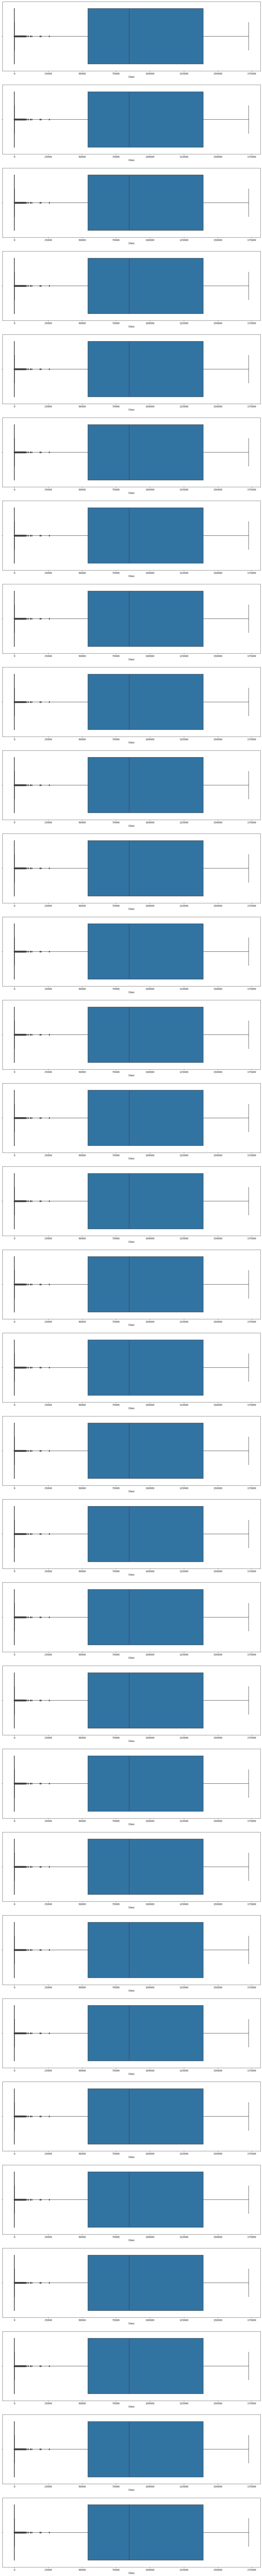

In [11]:
plotting(data)

In [12]:
# By Applying IQR theory
q1 = data['Amount'].quantile(0.25)
q3 = data['Amount'].quantile(0.75)
iqr = q3 - q1 

upper_whisker = q3 + 1.5* iqr
lower_whisker = q1 - 1.5* iqr
if lower_whisker < 0 :
    lower_whisker = 0 
upper_whisker , lower_whisker

(185.375, 0)

In [13]:
filt2 = data['Amount'] >  upper_whisker 
filt3 = data['Amount'] <  lower_whisker

out2 = data[filt2].index
out3 = data[filt3].index
data.drop(out3 , axis = 0 , inplace =True)

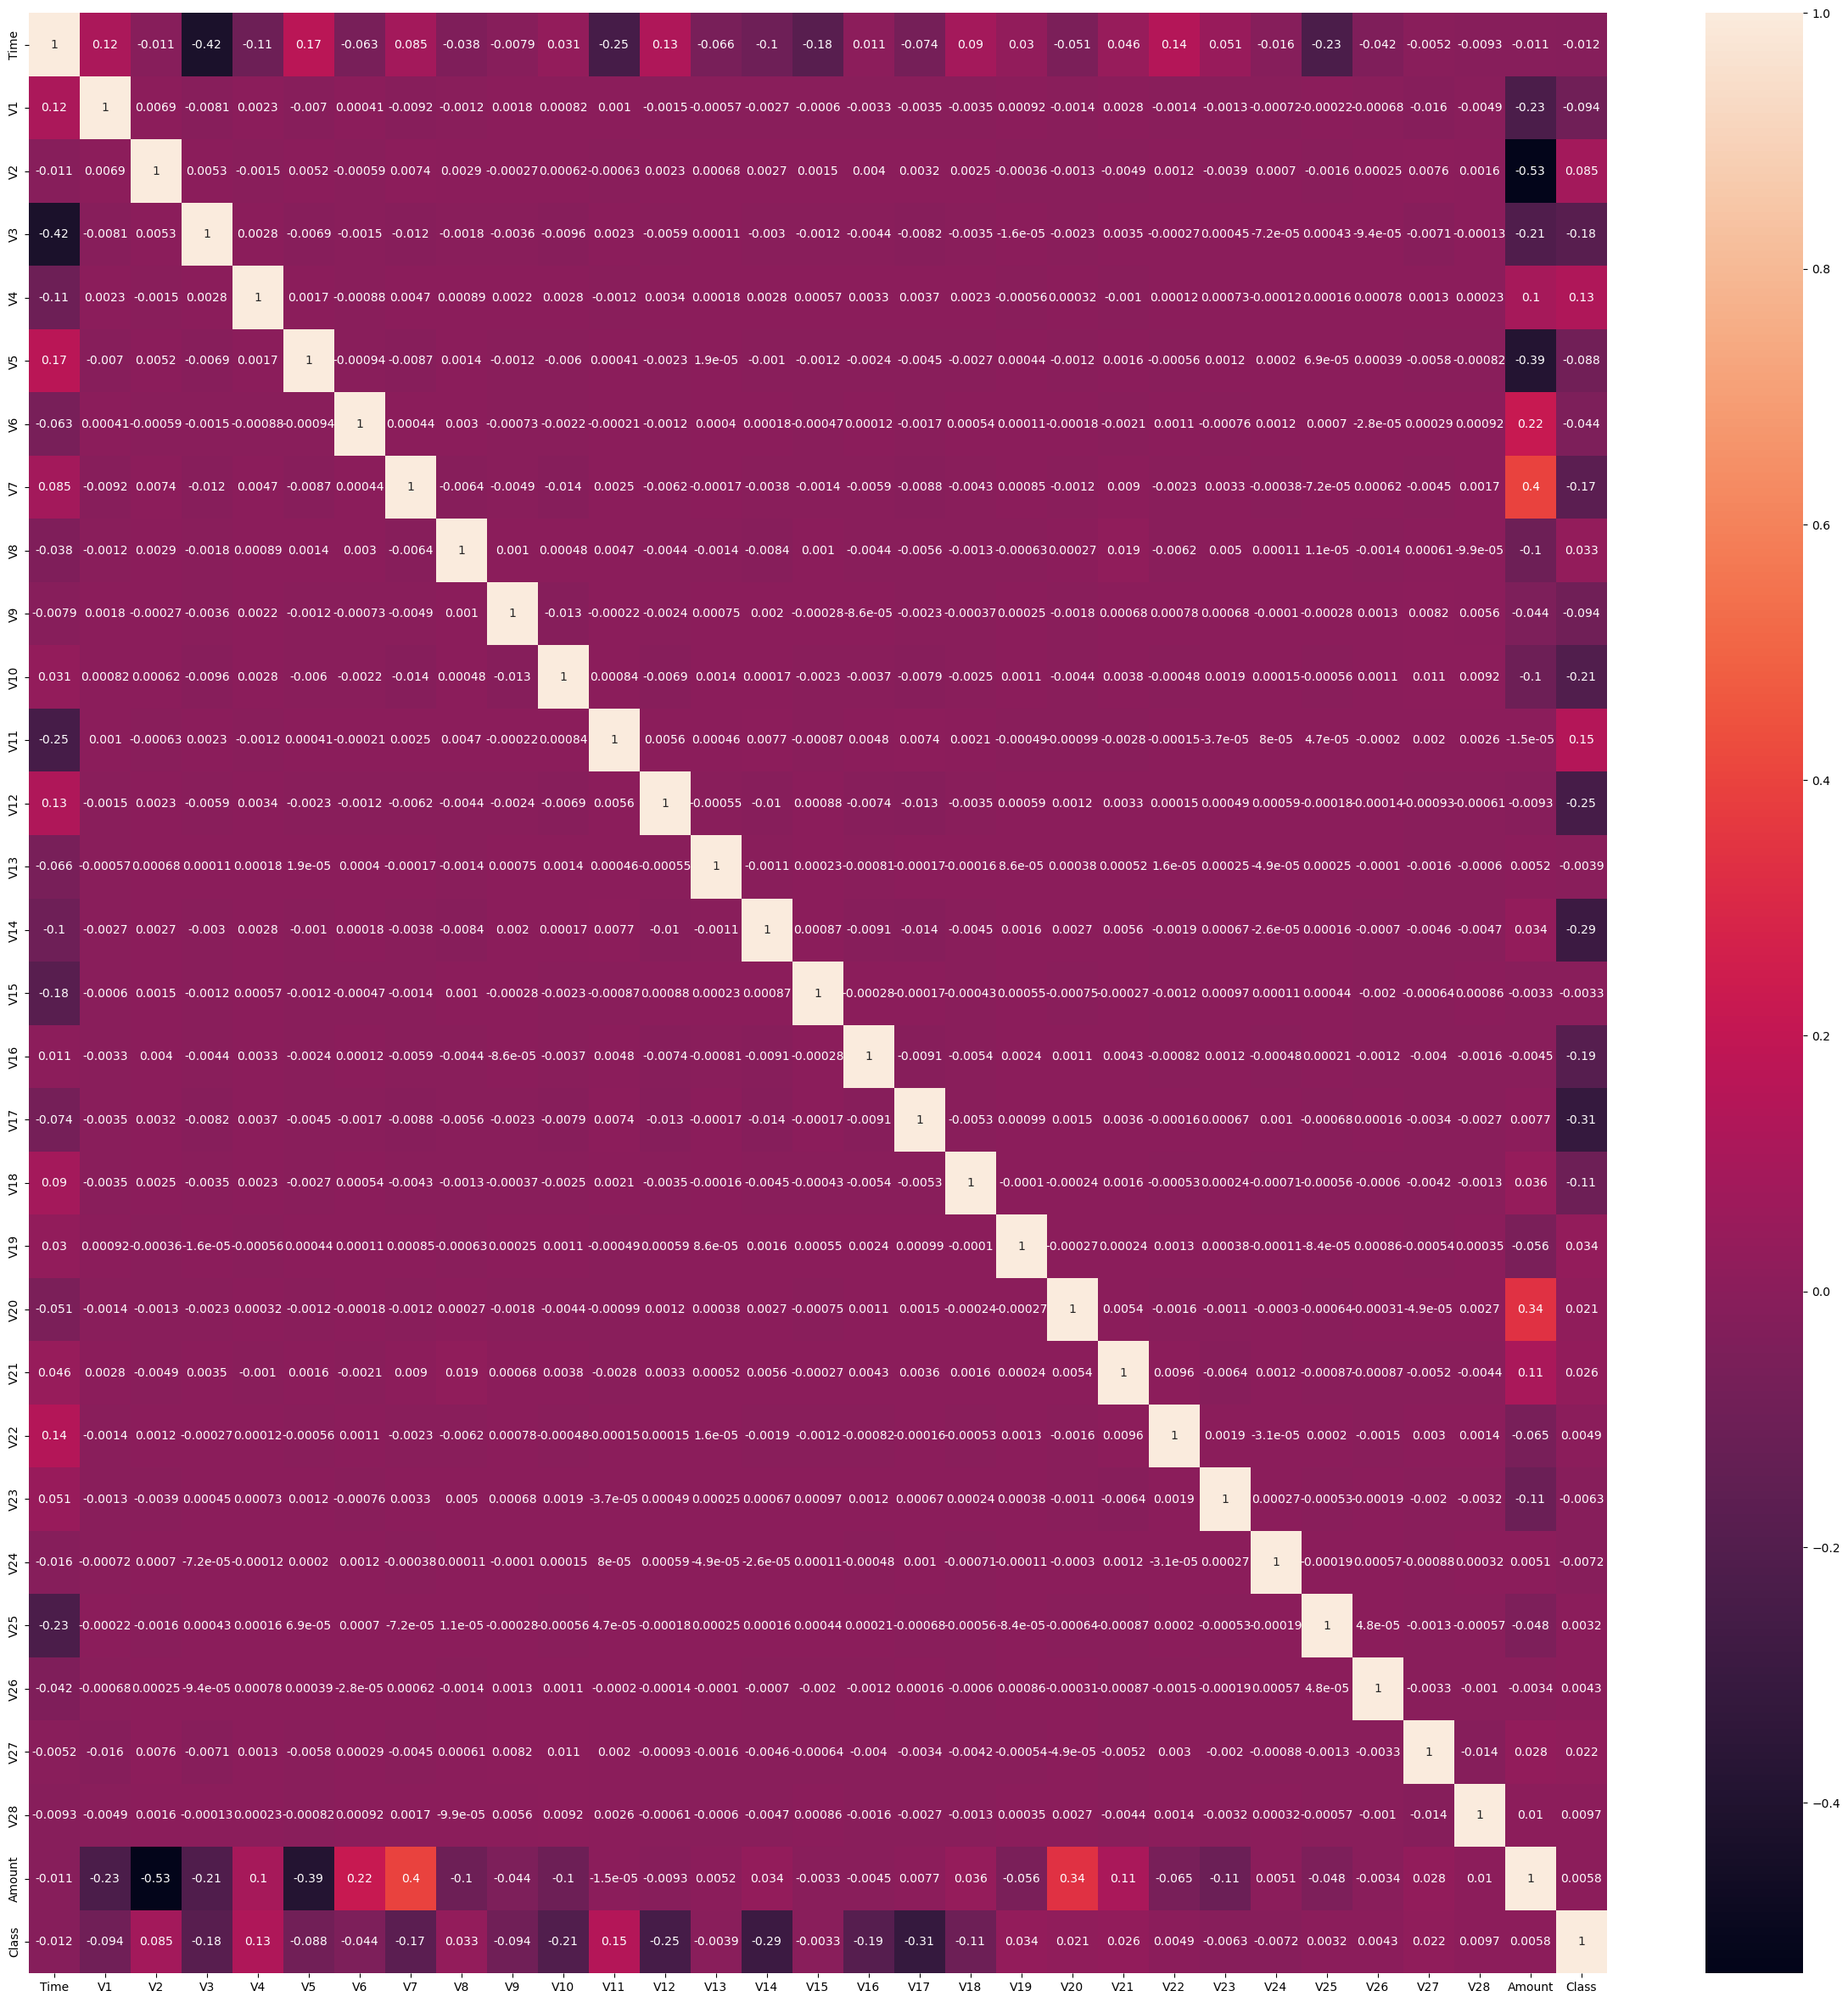

In [14]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr() , annot = True);

In [15]:
x = data.drop('Class' , axis = 1)
y = data['Class']

In [16]:
from sklearn.model_selection import train_test_split 

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , shuffle=True , stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler 

scl = StandardScaler()

x_train= scl.fit_transform(x_train) 
x_test = scl.transform(x_test)

In [18]:
y_train.value_counts()

0    226602
1       378
Name: Class, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
tl = SMOTE()
X_res, y_res = tl.fit_resample(x_train, y_train)

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_res,y_res)

RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

y_pred = model.predict(X_res)

print(confusion_matrix(y_pred, y_res))

tn, fp, fn, tp = confusion_matrix(y_res, y_pred).ravel()

specificity_tra = round(tn / (tn+fp) , 4)
acc_tra=round(accuracy_score(y_pred,y_res),4)
rec_tra = round(recall_score(y_pred,y_res),4)
pre_tra= round(precision_score(y_pred,y_res),4)
f1_tra=round(f1_score(y_pred,y_res) , 4)
print("accuracy_score : " , acc_tra)
print("recall_score : " ,rec_tra)
print("precision_score : ",pre_tra)
print("f1_score : " ,f1_tra)
print("specificity :", specificity_tra)


[[226602      0]
 [     0 226602]]
accuracy_score :  1.0
recall_score :  1.0
precision_score :  1.0
f1_score :  1.0
specificity : 1.0


In [22]:

y_pred = model.predict(x_test)

print(confusion_matrix(y_pred, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

specificity_tra = round(tn / (tn+fp) , 4)
acc_tra=round(accuracy_score(y_pred,y_test),4)
rec_tra = round(recall_score(y_pred,y_test),4)
pre_tra= round(precision_score(y_pred,y_test),4)
f1_tra=round(f1_score(y_pred,y_test) , 4)
print("accuracy_score : " , acc_tra)
print("recall_score : " ,rec_tra)
print("precision_score : ",pre_tra)
print("f1_score : " ,f1_tra)
print("specificity :", specificity_tra)


[[56639    17]
 [   12    78]]
accuracy_score :  0.9995
recall_score :  0.8667
precision_score :  0.8211
f1_score :  0.8432
specificity : 0.9998
